# **Tech Challenge - IBOVESPA**

## **1. Introdução**

Este projeto tem como foco a construção de um modelo preditivo para analisar e prever a tendência diária do índice IBOVESPA, indicando se seu fechamento será em alta ou baixa no dia seguinte. \
A iniciativa faz parte de um Tech Challenge proposto por um fundo de investimentos brasileiro, visando fornecer um insumo valioso para a tomada de decisões.

## **2. Objetivo**

O objetivo é criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior (↑) ou menor (↓) que o do dia atual.

**Métricas esperadas:**
* O modelo deve alcançar uma acurácia mínima de 75% na previsão da tendência em um conjunto de teste.
* O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

**Entregas esperadas:**
* **Storytelling Técnico:** Uma apresentação (PPT, PDF ou ferramenta de sua preferência) detalhando a aquisição e exploração dos dados, estratégia de engenharia de atributos, preparação da base, escolha e justificativa do modelo, e análise das métricas e resultados.
* **Justificativa Técnica:** Uma explicação clara sobre os modelos utilizados, como a natureza sequencial dos dados foi tratada (ex: janelas deslizantes, features lagged), e os trade-offs entre acurácia e overfitting.
* **Arquivo do Projeto:** Uma pasta .zip contendo todos os arquivos do projeto, ou um link para o repositório do GitHub.
* **Vídeo:** Um vídeo de no máximo 5 minutos, com uma visão gerencial, explicando como interpretar os resultados obtidos. Todos os membros do grupo devem aparecer no vídeo.


## **3. Materiais e Ferramentas**

Variáveis Presentes no DataFrame:

* **data_pregao:** Data de funcionamento do pregão.
* **preco_fechamento:** Preço final do IBOVESPA no dia.
* **preco_abertura:** Preço inicial do IBOVESPA no dia.
* **preco_maximo:** Preço mais alto que o IBOVESPA atingiu no dia.
* **preco_minimo:** Preço mais baixo que o IBOVESPA atingiu no dia.
* **volume:** Quantidade de negociações no dia.
* **variacao:** Mudança no preço em relação ao dia anterior (pode ser em pontos ou percentual).



#### Importando os dados

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

In [30]:
# Base de dados exportada período: 01/01/2005 a 09/07/2025
df_ibovespa = pd.read_csv(r"D:\Cursos\FIAP\ibovespa\dataset\dados_historicos_ibovespa.csv", sep=",")

In [31]:
df_ibovespa

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.03.2025,123.507,124.519,124.625,122.636,"8,81B","-0,81%"
1,10.03.2025,124.519,125.031,125.031,123.471,"9,37B","-0,41%"
2,07.03.2025,125.035,123.357,125.822,122.530,"9,98B","1,36%"
3,06.03.2025,123.358,123.048,124.112,122.681,"10,06B","0,25%"
4,05.03.2025,123.047,122.799,123.364,122.747,"9,60B","0,20%"
...,...,...,...,...,...,...,...
4995,07.01.2005,24.747,24.376,24.874,24.376,"104,96M","1,56%"
4996,06.01.2005,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
4997,05.01.2005,24.692,24.859,25.001,24.523,"127,42M","-0,63%"
4998,04.01.2005,24.848,25.722,25.873,24.791,"146,14M","-3,40%"


#### Análise Exploratória dos Dados (EDA)

In [32]:
#Verificando os primeiros registros com o .head()
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.03.2025,123.507,124.519,124.625,122.636,"8,81B","-0,81%"
1,10.03.2025,124.519,125.031,125.031,123.471,"9,37B","-0,41%"
2,07.03.2025,125.035,123.357,125.822,122.530,"9,98B","1,36%"
3,06.03.2025,123.358,123.048,124.112,122.681,"10,06B","0,25%"
4,05.03.2025,123.047,122.799,123.364,122.747,"9,60B","0,20%"


In [33]:
#Verificando os últimos registros com o .tail()
df_ibovespa.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
4995,07.01.2005,24.747,24.376,24.874,24.376,"104,96M","1,56%"
4996,06.01.2005,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
4997,05.01.2005,24.692,24.859,25.001,24.523,"127,42M","-0,63%"
4998,04.01.2005,24.848,25.722,25.873,24.791,"146,14M","-3,40%"
4999,03.01.2005,25.722,26.193,26.492,25.671,"115,64M","-1,81%"


In [34]:
df_ibovespa.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')

In [35]:
#Renomeando colunas para fácil leitura dos dados
df_ibovespa.rename(columns={'Data': 'data_pregao',
    'Último': 'preco_fechamento',
    'Abertura': 'preco_abertura',
    'Máxima': 'preco_maximo',
    'Mínima': 'preco_minimo',
    'Vol.': 'volume',
    'Var%': 'variacao'}, inplace=True)

df_ibovespa.columns

Index(['data_pregao', 'preco_fechamento', 'preco_abertura', 'preco_maximo',
       'preco_minimo', 'volume', 'variacao'],
      dtype='object')

In [36]:
#Verificando os tipos
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_pregao       5000 non-null   object 
 1   preco_fechamento  5000 non-null   float64
 2   preco_abertura    5000 non-null   float64
 3   preco_maximo      5000 non-null   float64
 4   preco_minimo      5000 non-null   float64
 5   volume            4999 non-null   object 
 6   variacao          5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [37]:
df_ibovespa.head(2)

,data_pregao,preco_fechamento,preco_abertura,preco_maximo,preco_minimo,volume,variacao
0,11.03.2025,123.507,124.519,124.625,122.636,"8,81B","-0,81%"
1,10.03.2025,124.519,125.031,125.031,123.471,"9,37B","-0,41%"


In [38]:
#Convertendo o tipo de data
df_ibovespa['data_pregao'] = pd.to_datetime(df_ibovespa.data_pregao, format='%d.%m.%Y')

#Definição do 'data_pregao' como o índice do DataFrame
df_ibovespa = df_ibovespa.set_index('data_pregao')
print(f"\nNúmero de linhas antes: {len(df_ibovespa)}")

#Aplicando a inserção de dias faltantes relacionados a FDS e Feriados
df_ibovespa = df_ibovespa.asfreq('D').ffill()#Metodo .ffill() preenche os NaN com o útlimo valor válido observado
print(f"\nNúmero de linhas depois: {len(df_ibovespa)}")

#Ordenando o DataFrame pela data do pregão
#Isso é importante para garantir que os dados estejam em ordem cronológica
df_ibovespa.sort_values(by='data_pregao', inplace=True)


Número de linhas antes: 5000

Número de linhas depois: 7373


In [39]:
df_ibovespa.head(10)

,preco_fechamento,preco_abertura,preco_maximo,preco_minimo,volume,variacao
data_pregao,,,,,,
2005-01-03,25.722,26.193,26.492,25.671,"115,64M","-1,81%"
2005-01-04,24.848,25.722,25.873,24.791,"146,14M","-3,40%"
2005-01-05,24.692,24.859,25.001,24.523,"127,42M","-0,63%"
2005-01-06,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
2005-01-07,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-08,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-09,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-10,24.292,24.747,24.825,24.086,"126,23M","-1,84%"
2005-01-11,24.370,24.295,24.457,24.127,"111,40M","0,32%"


In [40]:
df_ibovespa.tail(10)

,preco_fechamento,preco_abertura,preco_maximo,preco_minimo,volume,variacao
data_pregao,,,,,,
2025-03-02,122.799,124.798,124.916,122.659,"24,87B","-1,60%"
2025-03-03,122.799,124.798,124.916,122.659,"24,87B","-1,60%"
2025-03-04,122.799,124.798,124.916,122.659,"24,87B","-1,60%"
2025-03-05,123.047,122.799,123.364,122.747,"9,60B","0,20%"
2025-03-06,123.358,123.048,124.112,122.681,"10,06B","0,25%"
2025-03-07,125.035,123.357,125.822,122.530,"9,98B","1,36%"
2025-03-08,125.035,123.357,125.822,122.530,"9,98B","1,36%"
2025-03-09,125.035,123.357,125.822,122.530,"9,98B","1,36%"
2025-03-10,124.519,125.031,125.031,123.471,"9,37B","-0,41%"


In [41]:
#Convertendo a coluna variacao
print("DataFrame antes da conversão da coluna 'variacao':")
print(df_ibovespa[['variacao']])
print(df_ibovespa['variacao'].dtype) #Tipo de dado atual
print("-" * 30)

DataFrame antes da conversão da coluna 'variacao':
            variacao
data_pregao         
2005-01-03    -1,81%
2005-01-04    -3,40%
2005-01-05    -0,63%
2005-01-06    -1,32%
2005-01-07     1,56%
...              ...
2025-03-07     1,36%
2025-03-08     1,36%
2025-03-09     1,36%
2025-03-10    -0,41%
2025-03-11    -0,81%

[7373 rows x 1 columns]
object
------------------------------


In [42]:
#Usamos .str.replace('%', '') para aplicar a substituição em strings
df_ibovespa['variacao'] = df_ibovespa['variacao'].str.replace('%', '')

#Usamos .str.replace(',', '.') para substituir a vírgula por ponto
df_ibovespa['variacao'] = df_ibovespa['variacao'].str.replace(',', '.')

#Usamos pd.to_numeric() para converter. errors='coerce' é importante!
#Ele transformará qualquer valor que não puder ser convertido em número em NaN (Not a Number)
df_ibovespa['variacao'] = pd.to_numeric(df_ibovespa['variacao'], errors='coerce')

In [43]:
print("\nDataFrame após a conversão da coluna 'variacao':")
print(df_ibovespa[['variacao']])
print(df_ibovespa['variacao'].dtype) #Tipo de dado após a conversão


DataFrame após a conversão da coluna 'variacao':
             variacao
data_pregao          
2005-01-03      -1.81
2005-01-04      -3.40
2005-01-05      -0.63
2005-01-06      -1.32
2005-01-07       1.56
...               ...
2025-03-07       1.36
2025-03-08       1.36
2025-03-09       1.36
2025-03-10      -0.41
2025-03-11      -0.81

[7373 rows x 1 columns]
float64


In [44]:
#Convertendo a coluna volume
print("DataFrame antes da conversão da coluna 'volume':")
print(df_ibovespa[['volume']])
print(df_ibovespa['volume'].dtype) #Tipo de dado atual
print("-" * 30)

DataFrame antes da conversão da coluna 'volume':
              volume
data_pregao         
2005-01-03   115,64M
2005-01-04   146,14M
2005-01-05   127,42M
2005-01-06   151,17M
2005-01-07   104,96M
...              ...
2025-03-07     9,98B
2025-03-08     9,98B
2025-03-09     9,98B
2025-03-10     9,37B
2025-03-11     8,81B

[7373 rows x 1 columns]
object
------------------------------


In [45]:
#Função para tratar a coluna volume
def converter_volume(volume_str):
    if pd.isna(volume_str): #Verifica se o valor é NaN (caso de dados ausentes)
        return np.nan

    volume_str = str(volume_str).strip().upper() #Garante string e remove espaços, converte para maiúscula

    if 'K' in volume_str:
        return float(volume_str.replace('K', '').replace(',', '.')) * 1_000
    elif 'M' in volume_str:
        return float(volume_str.replace('M', '').replace(',', '.')) * 1_000_000
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '').replace(',', '.')) * 1_000_000_000
    else:
        #Se não tiver K, M ou B, tenta converter diretamente (ex: '123' ou '123.45')
        try:
            return float(volume_str.replace(',', '.'))
        except ValueError:
            return np.nan #Retorna NaN se não conseguir converter

In [46]:
#Aplica a função à coluna volume
df_ibovespa['volume'] = df_ibovespa['volume'].apply(converter_volume)
df_ibovespa['volume'] = df_ibovespa['volume'].fillna(0).astype(np.int64)

In [47]:
print("DataFrame após a conversão da coluna 'volume':")
print(df_ibovespa[['volume']])
print(df_ibovespa['volume'].dtype) #Tipo de dado atual
print("-" * 30)

DataFrame após a conversão da coluna 'volume':
                 volume
data_pregao            
2005-01-03    115640000
2005-01-04    146140000
2005-01-05    127420000
2005-01-06    151170000
2005-01-07    104960000
...                 ...
2025-03-07   9980000000
2025-03-08   9980000000
2025-03-09   9980000000
2025-03-10   9370000000
2025-03-11   8810000000

[7373 rows x 1 columns]
int64
------------------------------


In [48]:
#Verificando se o conjunto de dados possui nulos
df_ibovespa.isnull().sum()

preco_fechamento    0
preco_abertura      0
preco_maximo        0
preco_minimo        0
volume              0
variacao            0
dtype: int64

<Axes: >

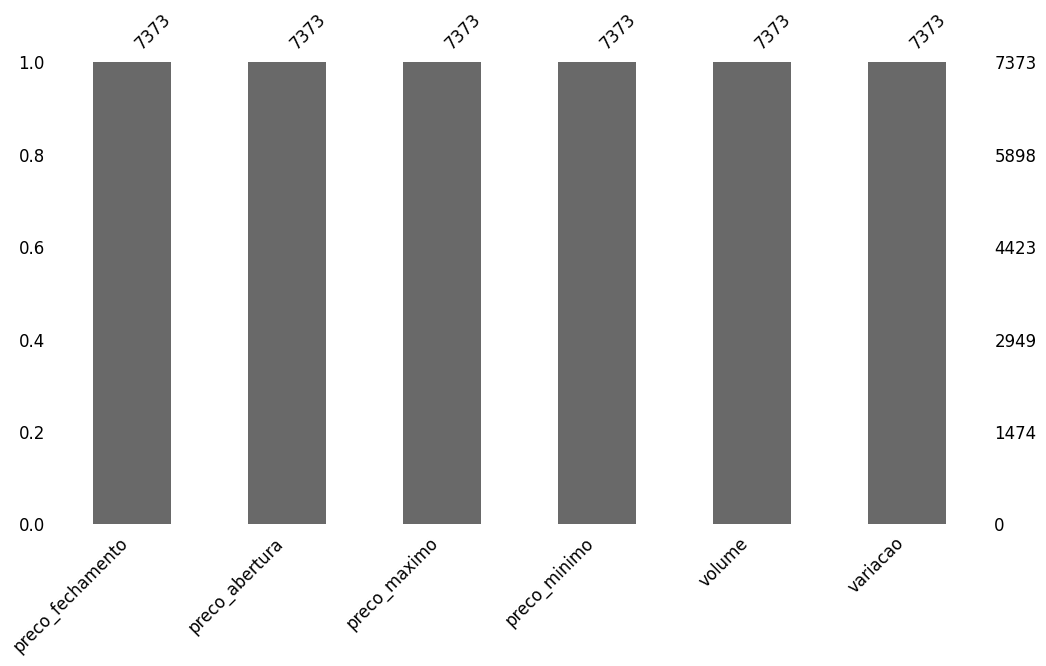

In [49]:
#Verificando a quantidade de dados faltantes através do missingno
#As barras representam a quantidade de dados faltantes em cada coluna, nosso dataframe possui 7373 dados em todas as colunas, confirmando que não há dados faltantes
msno.bar(df_ibovespa, figsize=(12, 6), fontsize=12)

In [50]:
#Como ficou nosso DataFrame após as conversões
print("\nInformações do DataFrame após as mudanças:")
df_ibovespa.info()


Informações do DataFrame após as mudanças:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7373 entries, 2005-01-03 to 2025-03-11
Freq: D
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   preco_fechamento  7373 non-null   float64
 1   preco_abertura    7373 non-null   float64
 2   preco_maximo      7373 non-null   float64
 3   preco_minimo      7373 non-null   float64
 4   volume            7373 non-null   int64  
 5   variacao          7373 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 403.2 KB


In [51]:
df_ibovespa.describe().T

,count,mean,std,min,25%,50%,75%,max
preco_fechamento,7373.0,7.264920e+01,2.934446e+01,23.610,51.804,63.412,1.005520e+02,1.373440e+02
preco_abertura,7373.0,7.263059e+01,2.935788e+01,23.618,51.712,63.477,1.005410e+02,1.373490e+02
preco_maximo,7373.0,7.331479e+01,2.951154e+01,24.006,52.338,64.055,1.015630e+02,1.374690e+02
preco_minimo,7373.0,7.194763e+01,2.919169e+01,23.534,51.185,62.775,9.948800e+01,1.366640e+02
volume,7373.0,1.173246e+08,1.112288e+09,112100.000,2820000.000,4500000.000,1.113000e+07,2.487000e+10
variacao,7373.0,5.145667e-02,1.617882e+00,-14.780,-0.810,0.070,9.300000e-01,1.466000e+01


Matriz de Correlação

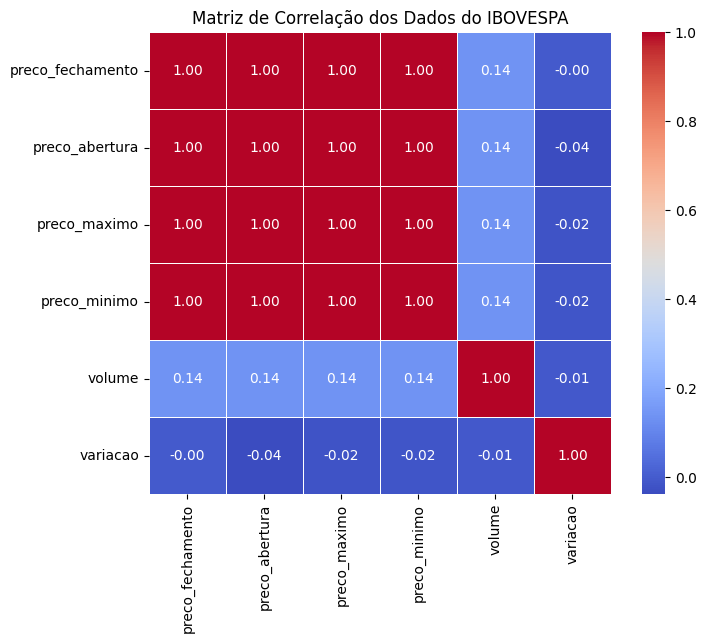

In [52]:
#Correlação entre os dados
correlation_matrix = df_ibovespa.corr(method='pearson')

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Matriz de Correlação dos Dados do IBOVESPA')
plt.show()


O Pair Plot é extremamente informativo. Ele não apenas confirma as correlações lineares esperadas entre os preços, mas, crucialmente, ele revela padrões não lineares (como variacao vs. volume) e as distribuições individuais das variáveis (a bimodalidade dos preços e a assimetria do volume), que são insights que uma matriz de correlação numérica ou um heatmap simples não conseguem oferecer.

<Figure size 1200x1200 with 0 Axes>

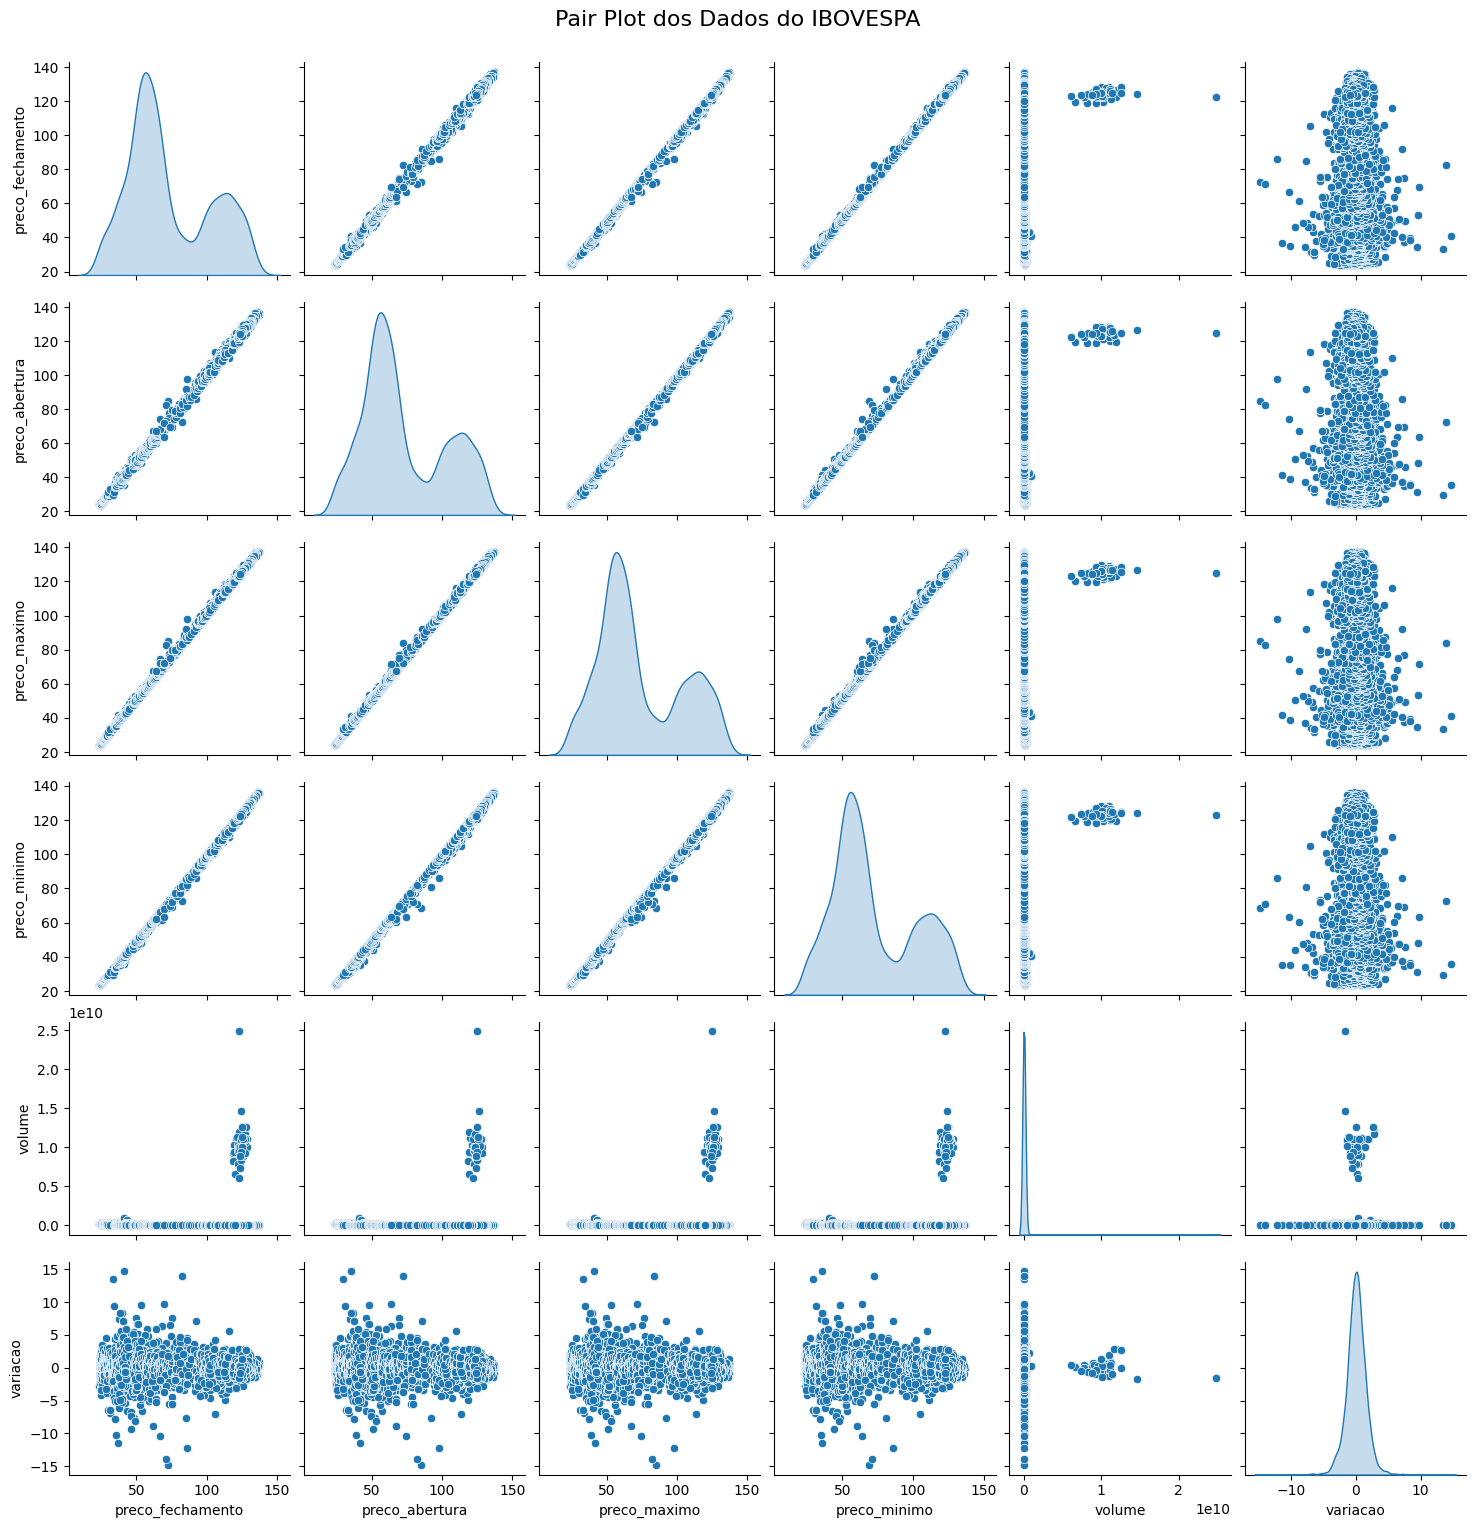

In [53]:
#Usando pair plot para visualizar a relação entre as variáveis
plt.figure(figsize=(12, 12))
sb.pairplot(df_ibovespa, diag_kind='kde')
plt.suptitle('Pair Plot dos Dados do IBOVESPA', y=1.02, fontsize=16)
plt.show()

array([[<Axes: title={'center': 'preco_fechamento'}>,
        <Axes: title={'center': 'preco_abertura'}>],
       [<Axes: title={'center': 'preco_maximo'}>,
        <Axes: title={'center': 'preco_minimo'}>],
       [<Axes: title={'center': 'volume'}>,
        <Axes: title={'center': 'variacao'}>]], dtype=object)

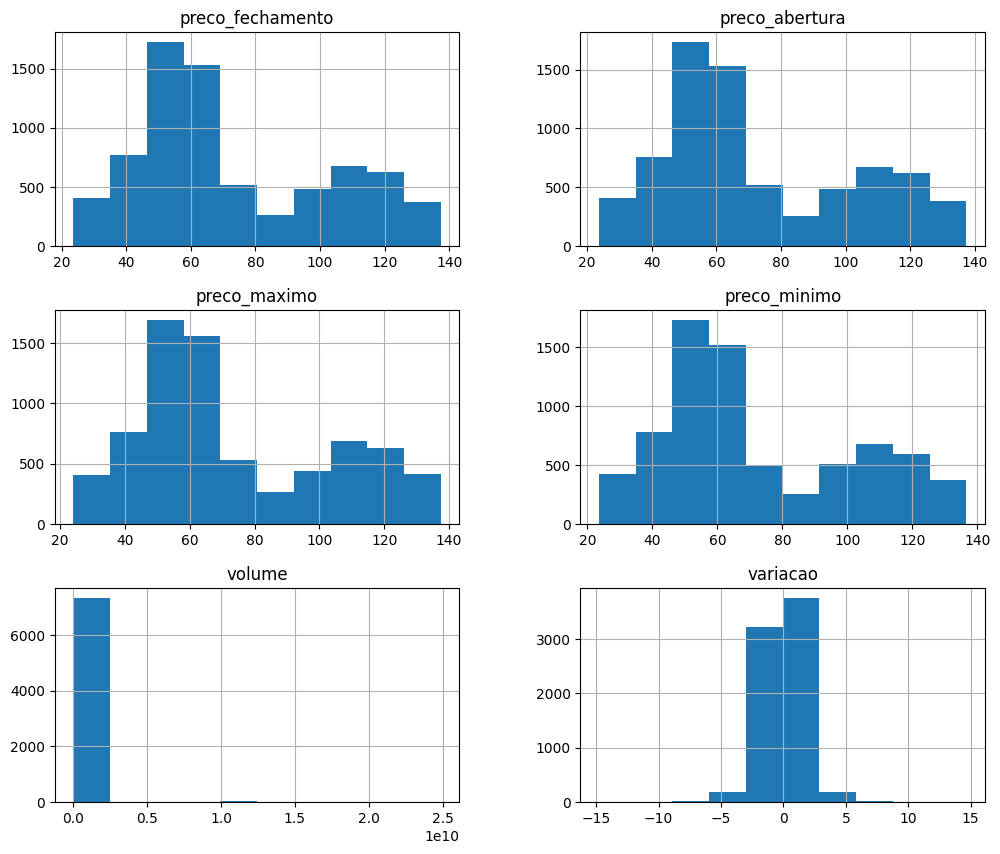

In [54]:
#Plotando o histograma para verificarmos a frequência de cada variável
df_ibovespa.hist(figsize=(12,10))